# Burgers' equation

Burgers equation was proposed as a model of turbulent fluid motion by J. M. Burgers in a series of several articles. 

$$u_t + u u_x = \varepsilon u_{xx}$$

The Burgers’ equation is the simplest nonlinear hyperbolic equation


## Short definition
The parameter $\varepsilon \geq 0$ is typically referred to as the viscosity, due to the connection between this equation and the study of fluid dynamics. When ν > 0, it is often referred to as the viscous Burgers equation, and when ν = 0 it is often referred to as the inviscid Burgers equation. 

### Motivating application

The Burgers’ equation is one of a few nonlinear equations which can be solved exactly for an arbitrary initial and boundary conditions. However these **exact solutions are impractical for the small values** of viscosity constant due to a slow convergence of series solutions. Thus many numerical schemes are constructed for a numerical solution of the Burgers’ equation **for small values of viscosity constant** which corresponds to a steep front in the propagation of dynamic

* It is important in a variety of applications, perhaps most notably as **a simplification of the Navier-Stokes equation**, which models fluid dynamics. 

* In addition, is used as **a prototypical PDE** to develop many of the fundamental tools used to analyze general classes of PDEs. For example, when $\varepsilon = 0$ Burgers equation is one of the simplest nonlinear conservation laws, and when $\varepsilon > 0$ it is one of the simplest nonlinear dissipative PDEs, due to the resulting decay of energy. 

* With the addition of stochastic forcing, it has played an important role in **the theoretical development of stochastic PDEs**.

* Furthermore, the diffusion wave and viscous rarefaction wave can be used **to characterize the large-time behavior of more general scalar viscous conservation laws**. This is related to the fact that the term $u_{xx}$ is critical, in the sense that it lies on the boundary between nonlinear terms that cause blow-up and those whose effect can be absorbed by the diffusive decay induced by the term $u_{xx}$



### Gradient Catastrophe / Shock formation

![Gradient Catastrophe](picture.png)


This equation may not have a unique solution! This happens when the **characteristics cross**, as will eventually happen if $u_x(x, 0)$ is negative at any point. At the time $T_b$ where the characteristics first cross, the function $u(x,t)$ has an infinite slope - the wave breaks and a shock forms. 


![Characteristics](picture2.png)

Of course, the density of a gas cannot possibly be triple valued at a point. We can determine the correct physical behavior by adopting the vanishing **viscosity approach**.

Indeed, as the wave begins to break, the second derivative term $u_{xx}$ grows much faster than $u_x$, and at some point the $\varepsilon u_{xx}$ term is comparable to the other terms and begins to play a role. This term keeps the solution smooth for all time, preventing breakdown of solutions that occurs for the hyperbolic problem. As $\varepsilon \rightarrow 0$ this zone becomes sharper and approaches the discontinuous solution known a shock. 

$$u_t + u u_x = \varepsilon u_{xx}$$



### Different schemes
* Inviscid case: Lax-Friedrichs method
$$U_j^{n+1} = \frac{U_{j-1}^{n} + U_{j+1}^{n}}{2} - \frac{\tau}{4h} \left[\left(U_{j+1}^n\right)^2 - \left(U_{j-1}^n\right)^2\right]$$

* Viscid case:
$$U_j^{n+1} = U_{j}^{n}- \frac{\tau}{4h} \left[ \left(U_{j+1}^n\right)^2 - \left(U_{j-1}^n\right)^2\right] + \frac{\varepsilon \tau}{h^2} \left[\left(U_{j+1}^n\right)^2 -2\left(U_{j}^n\right)^2 + \left(U_{j-1}^n\right)^2\right]$$



KeyboardInterrupt: 

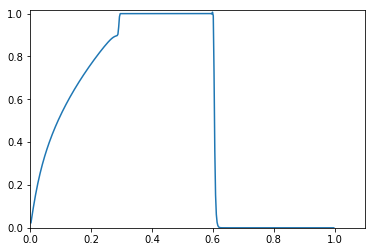

In [2]:
from math import sin, cos, exp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.animation as animation

class Burgers():
    def __init__(self, nx, T, nt, u0, eps = 0.1):
        self._nx = nx
        self._T = T
        self._nt = nt
        self._u0 = u0
        self._eps = eps
        
        self._h = h = np.array(1. / nx)
        self._ht = ht = np.array(T / nt)
        
        self._xs = xs = np.linspace(0., 1., nx)
        self._ts = ts = np.linspace(0., T, nt)
        
        self._U = np.zeros((nt, nx))
        self._U[0] = u0(ts)
        #self._U[:,0] = np.ones_like(xs)
        self._U_plot = np.zeros((nt, nx))
    
    def step_1method(self, n):
        value =  self._U[n-1, 2:] ** 2
        value -= self._U[n-1, 0:-2] ** 2
        value *= - 0.25 * self._ht / self._h
        value += 0.5 * (self._U[n-1, 2:] + self._U[n-1, 0:-2])
        return value
        
    def inviscid_1method(self):
        for n in range(1, self._nt):
            self._U[n, 1:-1] = self.step_1method(n)
            
        self._U_plot = self._U[:, 1:-1]
        return self._U_plot
    
    def step_2method(self, n):
        dx =  self._U[n-1, 2: ] ** 2
        dx -= self._U[n-1, 0:-2] ** 2
        dx *= - 0.25 * self._ht / self._h * self._U[n-1, 1:-1]
        d2x2 = self._U[n-1, 2:] - 2 * self._U[n-1, 1:-1] + self._U[n-1, :-2]
        d2x2 *=  self._eps * self._ht / (self._h ** 2)
        value = self._U[n-1, 1:-1] + dx + d2x2    
        return value
    
    def viscid_1method(self):
        for n in range(1, self._nt):
            self._U[n, 1:-1] = self.step_2method(n)
            
        self._U_plot = self._U[:, 1:-1]
        return self._U_plot
    
    def save_anim(self, fname, skip = 1):
        fig, ax = plt.subplots()
        line, = ax.plot(self._xs[1:-1], self._U_plot[0])
        
        def animate(i):
            line.set_ydata(self._U_plot[i])  
            return line,

        def init():
            ax.set_xlim(0, self._T)
            ax.set_ylim(np.min(self._U_plot), np.max(self._U_plot))
            return line,

        ani = animation.FuncAnimation(fig, animate, np.arange(1, self._nt,  skip), init_func=init,
                                      interval=25, blit=True)
        ani.save(fname, dpi=80, writer='imagemagick')
        
nx = 400
nt = 400
T = 1.1
eps = 0.001
def u0(x):
    n = len(x)
    return [1 for i in range( n // 2)] + [0 for i in range( n // 2 + n % 2)]

# def u0(x):
#     return np.sin(2 * np.pi *x)

# def u0(x):
#     return np.exp( - 5 * (x - 0.5) ** 2)


eq = Burgers(nx, T, nt, u0, eps = eps)
        
eq.viscid_1method()
#eq.inviscid_1method()
eq.save_anim("vis-exp2.gif", skip = 3)

# sin(2 pi x)
![1](invis-sin2.gif)
![1](vis-sin2.gif)

# exp(-(x-a)^2)
![1](invis-exp2.gif)
![1](vis-exp2.gif)

# x < 0.5: 1, else 0
![1](invis-line1.gif)
![1](vis-line1.gif)

# x < 0.5: 0, else 1
![1](invis-line2.gif)
![1](vis-line2.gif)

/Users/rasulkh/miniconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/rasulkh/miniconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


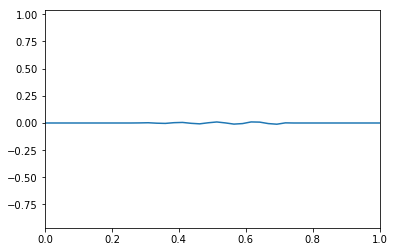

In [124]:
import scipy.integrate as integrate

eps = 0.001

def h(y):
    return -np.cos(2 * np.pi * y) / (2 * np.pi)

def K(x, y, t):
    return (x - y) ** 2 / (2 * t) + h(y)

def exp(x, y, t):
    return np.exp(- K(x, y, t) / (2 * eps))

def first_f(x, y, t):
    return (x - y) * exp(x, y, t) / t

def second_int(x, t):
    return integrate.quad(exp, -np.inf, np.inf, args = (x, t), limit=500)[0]

def first_int(x, t):
    return integrate.quad(first_f, -np.inf, np.inf, args = (x, t), limit=500)[0]
    
def u(x, t):
    int1 = first_int(x, t)
    int2 = second_int(x, t)
    if int2 != 0.: 
        return int1 / int2, int1, int2
    else:
        print('STOOOOOOP')
        return -1, int1, int2
    
x = np.linspace(1e-3, 1, 40)
nt = 20
U = [[] for i in range(nt)]
plt.figure(figsize=(15,10))

for step_t in range(1, nt + 1):
    for it in x:
        value, int1, int2 = u(it, step_t / nt)
        U[step_t - 1].append(value)

    #plt.plot(x, data)

fig, ax = plt.subplots()
line, = ax.plot(x, U[0])

def animate(i):
    line.set_ydata(U[i])  
    return line,

def init():
    ax.set_xlim(0, 1)
    ax.set_ylim(np.min(U), np.max(U))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, nt), init_func=init,
                              interval=25, blit=True)

ani.save('name.gif', dpi=80, writer='imagemagick')